In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [11]:
# Load flagged dataset #
dataset_flagged = pd.read_csv("../data/filtered.csv")
X = dataset_flagged.drop(['cls'], axis=1)
Y = dataset_flagged['cls']

In [12]:
summary_flagged_un = X.agg(['min', 'max']).T # agg applies both the min and max function, T transposes it
summary_flagged_un.columns = ['Min Value', 'Max Value'] # rename columns

display(summary_flagged_un)

,Min Value,Max Value
duration,18.0,14999998.0
min_fiat,0.0,14983442.0
min_biat,0.0,14983377.0
max_fiat,0.0,14983442.0
max_biat,0.0,14983377.0
mean_fiat,0.0,14983442.0
mean_biat,0.0,14983377.0
std_fiat,0.0,10600000.0
std_biat,0.0,10600000.0
pps,0.200414,166666.666667


Values should be scaled.

In [16]:
# Split dataset 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1, stratify=Y)

In [29]:
neighbor = 0
best_score = 0
mean_accuracies = {}
n_neighbors = range(1, 30, 2)

for k in n_neighbors:
    pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k))
    score = cross_val_score(pipeline, x_train, y_train, cv=10).mean()
    mean_accuracies[k] = score

    if best_score < score:
        best_score = score
        neighbor = k

final_test = KNeighborsClassifier(n_neighbors=neighbor)
score = cross_val_score(final_test, x_test, y_test, cv=10).mean()

print(f"Best cross-validation score: {best_score.item()}, with k: {neighbor}")

Best cross-validation score: 0.762545410197502, with k: 1


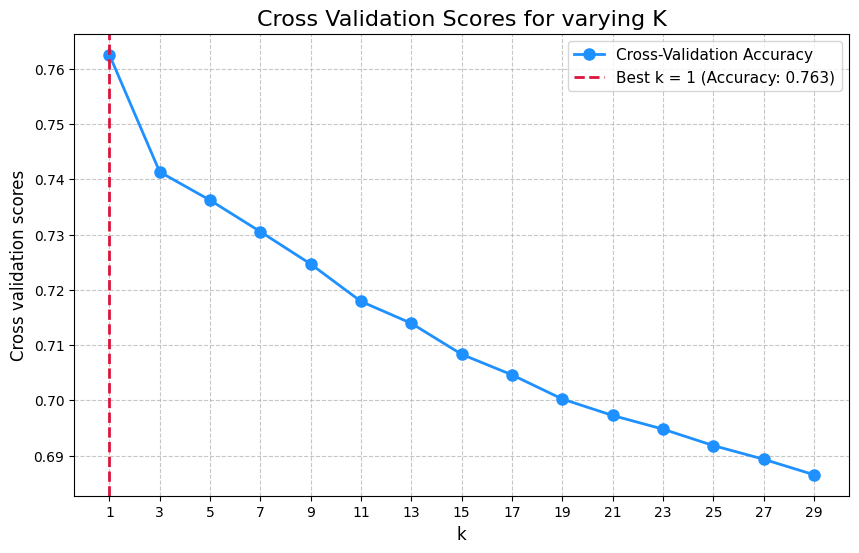

In [33]:
# --- The Enhanced Plot ---

# Set a good figure size for better visibility
plt.figure(figsize=(10, 6))

# Plot the accuracy scores with markers and a thicker line
plt.plot(n_neighbors, mean_accuracies.values(), 
         color='dodgerblue', 
         marker='o',          # Add markers to show each point
         linewidth=2,         # Make the line thicker
         markersize=8,        # Make the markers bigger
         label='Cross-Validation Accuracy')

# Highlight the best score with a vertical line
plt.axvline(x=neighbor, color='crimson', linestyle='--', linewidth=2,
            label=f'Best k = {neighbor} (Accuracy: {best_score:.3f})')

# Add titles and labels with improved font sizes
plt.title('Cross Validation Scores for varying K', fontsize=16)
plt.xlabel("k", fontsize=12)
plt.ylabel("Cross validation scores", fontsize=12)

# Set clearer x-axis ticks (showing every 2nd k)
plt.xticks(np.arange(min(n_neighbors), max(n_neighbors)+1, 2))

# Add a grid for easier value reading and a legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=11)

# Show the plot
plt.show()

In [43]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Set up the pipeline with scaling + KNN
knn = KNeighborsClassifier(n_neighbors=1)
pipeline = make_pipeline(StandardScaler(), knn)

# Fit the pipeline on training data
pipeline.fit(x_train, y_train)

# Predict on the test data using the pipeline
y_test_pred = pipeline.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Predict on the train data using the pipeline
y_train_pred = pipeline.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Train Accuracy: 1.0000
Test Accuracy: 0.7762
